## Importation des librairies

In [67]:
from qiskit import QuantumCircuit, Aer, transpile
from qiskit.visualization import plot_state_city

## Création d'un circuit de 2 Qbits

Comme il y a 4 grimoires, il est possible d'utiliser un système de 2 Qbits possédant les 4 états de base

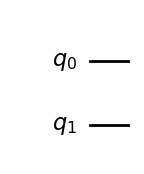

In [68]:
circ = QuantumCircuit(2)
circ.draw('mpl')

On associe chaque état à un des grimoires. Ainsi :

État 00 : grimoire 0
État 01 : grimoire 1
État 10 : grimoire 2
État 11 : grimoire 3

## Programmation de portes

### État initial
Au départ tous les grimoires ont la même probabilité d'être emprunté, c'est la politique de la bibliothèque quantique.

On peut obtenir cette probabilité en ajoutant des portes Hadamard sur q0 et q1.
Pour cet algorithme, la porte Hadamard est utilisée pour passer de la base 0 et 1 à la base + et -.

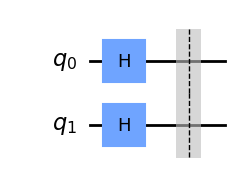

In [69]:
circ.h(0)
circ.h(1)
circ.barrier(range(2))
circ.draw('mpl')

### Intervention d'Aïka

Pour représenter l'intervention d'Aika, on aura besoin d'un Oracle.

On va partir sur la base que le rituel est inscrit sur le grimoire 0, donc pour représenter le pouvoir d'Aika, on aura besoin de :

- Une porte Not sur q0. La porte Not transforme l'état d'un Qbit en son état opposé.<br>
- Une porte CZ sur q0 et q1. La porte Contrôle Z (CZ) utilise deux Qbits : un Qbit de contrôle et un Qbit cible.
Si le Qbit de contrôle est dans l'état, 1 une porte Z est appliquée au Qbit cible. La porte Z fait faire une rotation de 180 degrés autour de l'axe des Z, ce qui est équivalent à inverser la phase de l'état 1. Elle peut par exemple transformer l'état + en l'état -.
Comme une porte Z n'a un effet que sur l'état 1, la porte CZ n'a d'éffet que si l'état des deux Qbits est 1.
- Une deuxième porte Not sur q0.

**Dans le cas où le rituel est inscrit sur un autre grimoire, le pouvoir d'Aîka devrait être représenté différemment.**


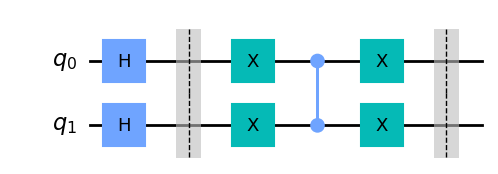

In [70]:
circ.x(0)
circ.x(1)
circ.cz(0,1)
circ.x(0)
circ.x(1)
circ.barrier(range(2))
circ.draw('mpl')

### Application du diffuseur


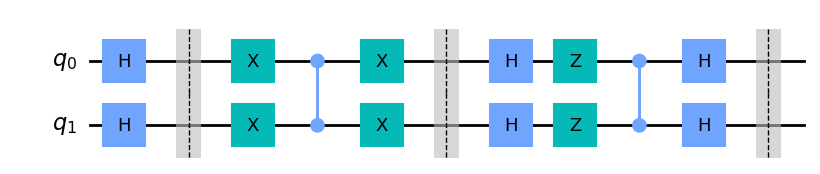

In [71]:
circ.h(0)
circ.h(1)
circ.z(0)
circ.z(1)
circ.cz(0,1)
circ.h(0)
circ.h(1)
circ.barrier(range(2))
circ.draw('mpl')

La porte Not transforme l'état d'un Qbit en son état opposé.
La porte Z fait faire une rotation de 180 degrés autour de l'axe des Z, ce qui est équivalent à inverser la phase de l'état 1.
Elle peut par exemple transformer l'état + en l'état -
finalement la 
Comme une porte Z n'a un effet que sur l'état 1, la porte CZ n'a d'éffet que si l'état des deux Qbits est 1.

## Mesure du circuit

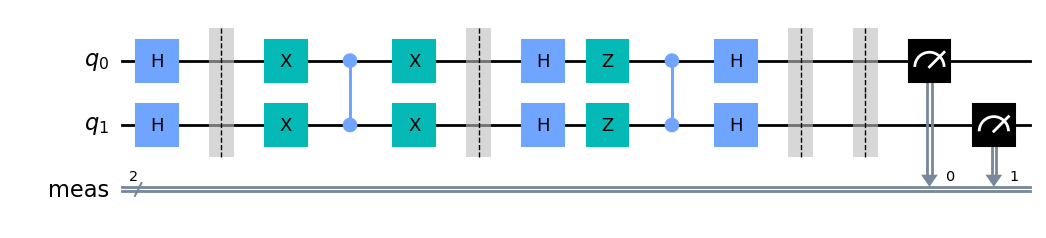

In [72]:
# Mesurer les 2 Qbits sur des bits classiques
circ.measure_all()

circ.draw('mpl')

## Simulation

In [75]:
# Création du simulateur à l'aide de la librairie Aer
backend = Aer.get_backend('statevector_simulator') 
circ = transpile(circ, backend)

# On exécute le circuit sur le simulateur
simulator = backend.run(circ)

# On récupère les résultats
result = simulator.result()
counts = result.get_counts()

print(counts)

{'00': 1}



Le grimoire à prendre est, alors, le grimoire 0, qui correspond à l'état 00
**Rappel :** on lit toujours les Qbits de droite à gauche

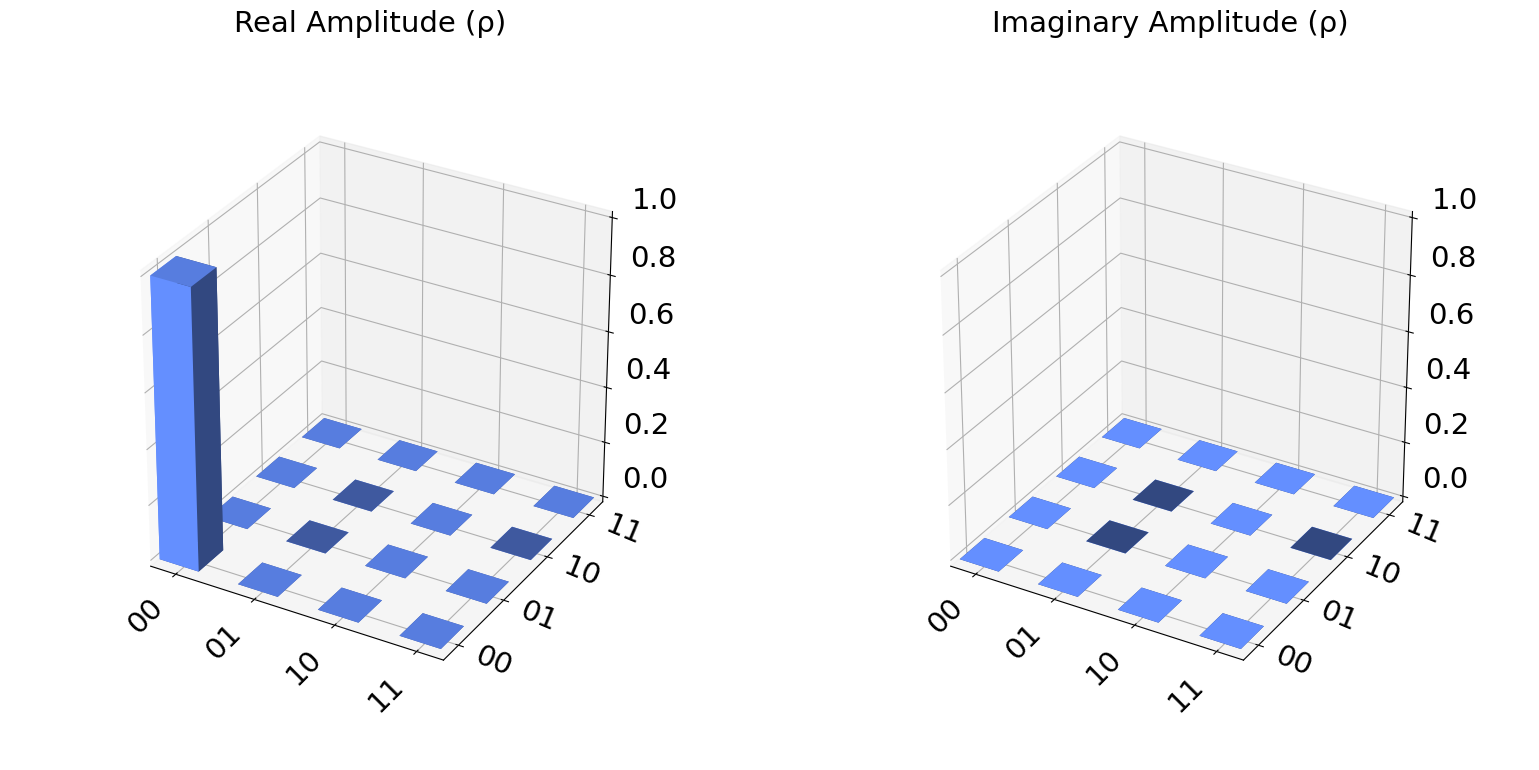

In [77]:
outputstate = result.get_statevector(circ, decimals=3)

plot_state_city(outputstate)

## Autres scénarios

### Cas 02 : le rituel est inscrit sur le grimoire 1 (état 01)

Pour représenter le pouvoir d'Aika, on aura besoin de :

- Une porte Not sur q1.<br>
- Une porte CZ sur q0 et q1.
- Une deuxième porte Not sur q1.

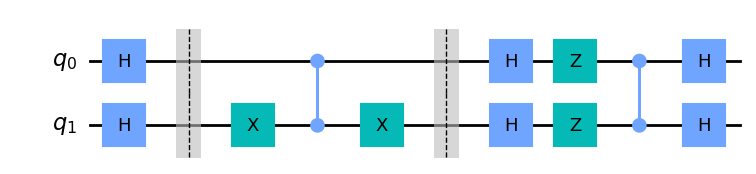

In [78]:
# Circuit de base
circ_2 = QuantumCircuit(2)
circ_2.h(0)
circ_2.h(1)
circ_2.barrier(range(2))

# Intervention d'Aïka
circ_2.x(1)
circ_2.cz(0,1)
circ_2.x(1)
circ_2.barrier(range(2))

# Diffuseur
circ_2.h(0)
circ_2.h(1)
circ_2.z(0)
circ_2.z(1)
circ_2.cz(0,1)
circ_2.h(0)
circ_2.h(1)

circ_2.draw('mpl')

In [79]:
# Mesure du circuit
circ_2.measure_all()

# Simulation
circ_2 = transpile(circ_2, backend)
simulator_2 = backend.run(circ_2)
result_2 = simulator_2.result()
counts_2 = result_2.get_counts()

print(counts_2)

{'01': 1}


Le grimoire à prendre est, alors, le grimoire 1, qui correspond à l’état 01

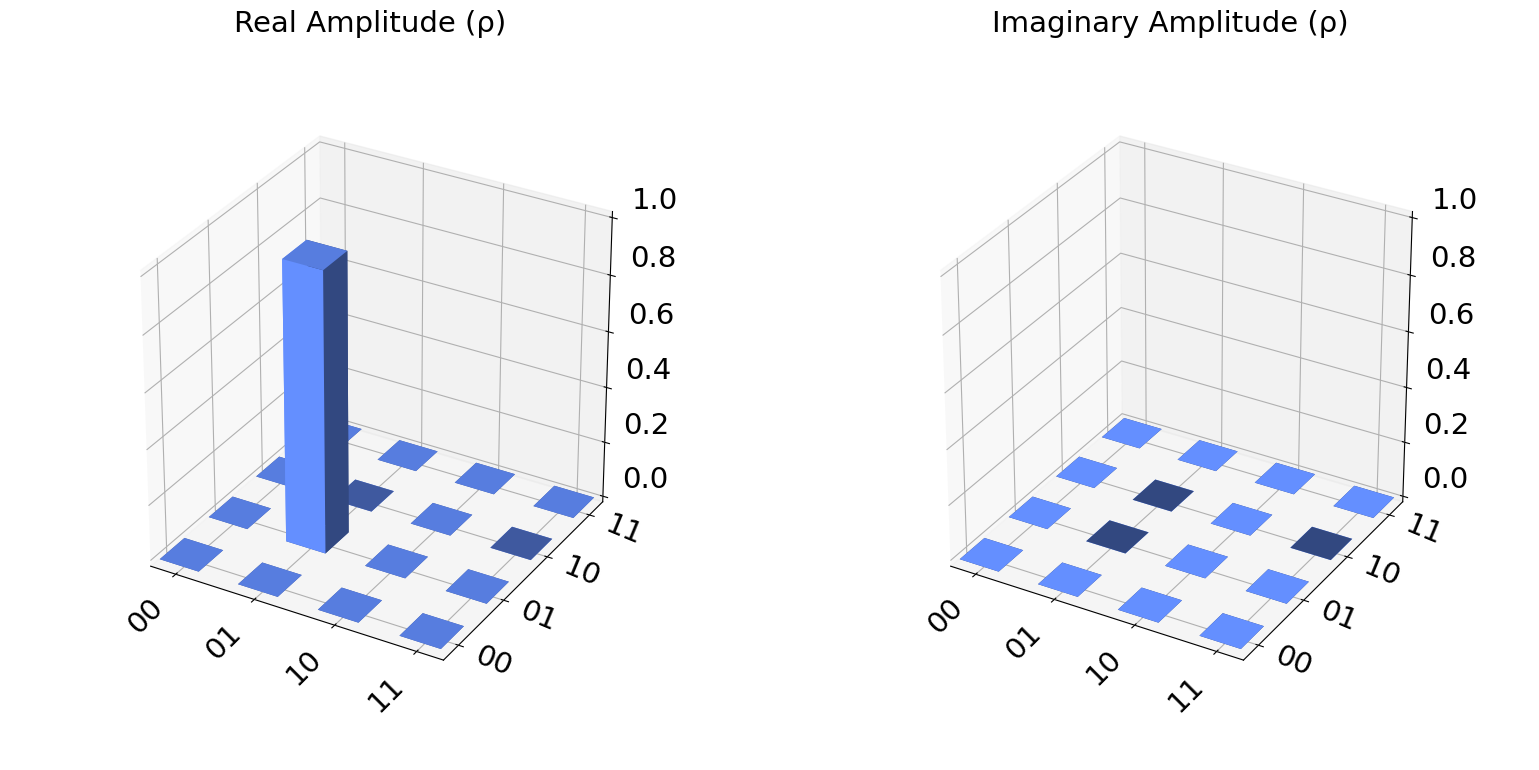

In [80]:
outputstate_2 = result_2.get_statevector(circ_2, decimals=3)

plot_state_city(outputstate_2)

### Cas 03 : le rituel est inscrit sur le grimoire 2 (état 10)

Pour représenter le pouvoir d'Aika, on aura besoin de :

- Une porte Not sur q0.<br>
- Une porte CZ sur q0 et q1.
- Une deuxième porte Not sur q0.

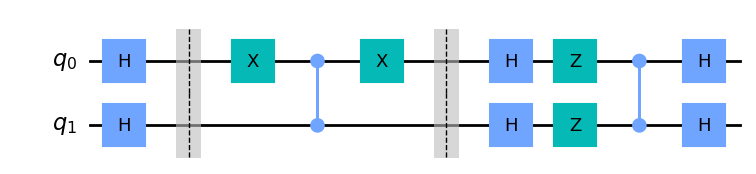

In [81]:
# Circuit de base
circ_3 = QuantumCircuit(2)
circ_3.h(0)
circ_3.h(1)
circ_3.barrier(range(2))

# Intervention d'Aïka
circ_3.x(0)
circ_3.cz(0,1)
circ_3.x(0)
circ_3.barrier(range(2))

# Diffuseur
circ_3.h(0)
circ_3.h(1)
circ_3.z(0)
circ_3.z(1)
circ_3.cz(0,1)
circ_3.h(0)
circ_3.h(1)

circ_3.draw('mpl')

In [82]:
# Mesure du circuit
circ_3.measure_all()

# Simulation
circ_3 = transpile(circ_3, backend)
simulator_3 = backend.run(circ_3)
result_3 = simulator_3.result()
counts_3 = result_3.get_counts()

print(counts_3)

{'10': 1}


Le grimoire à prendre est, alors, le grimoire 2, qui correspond à l’état 10 

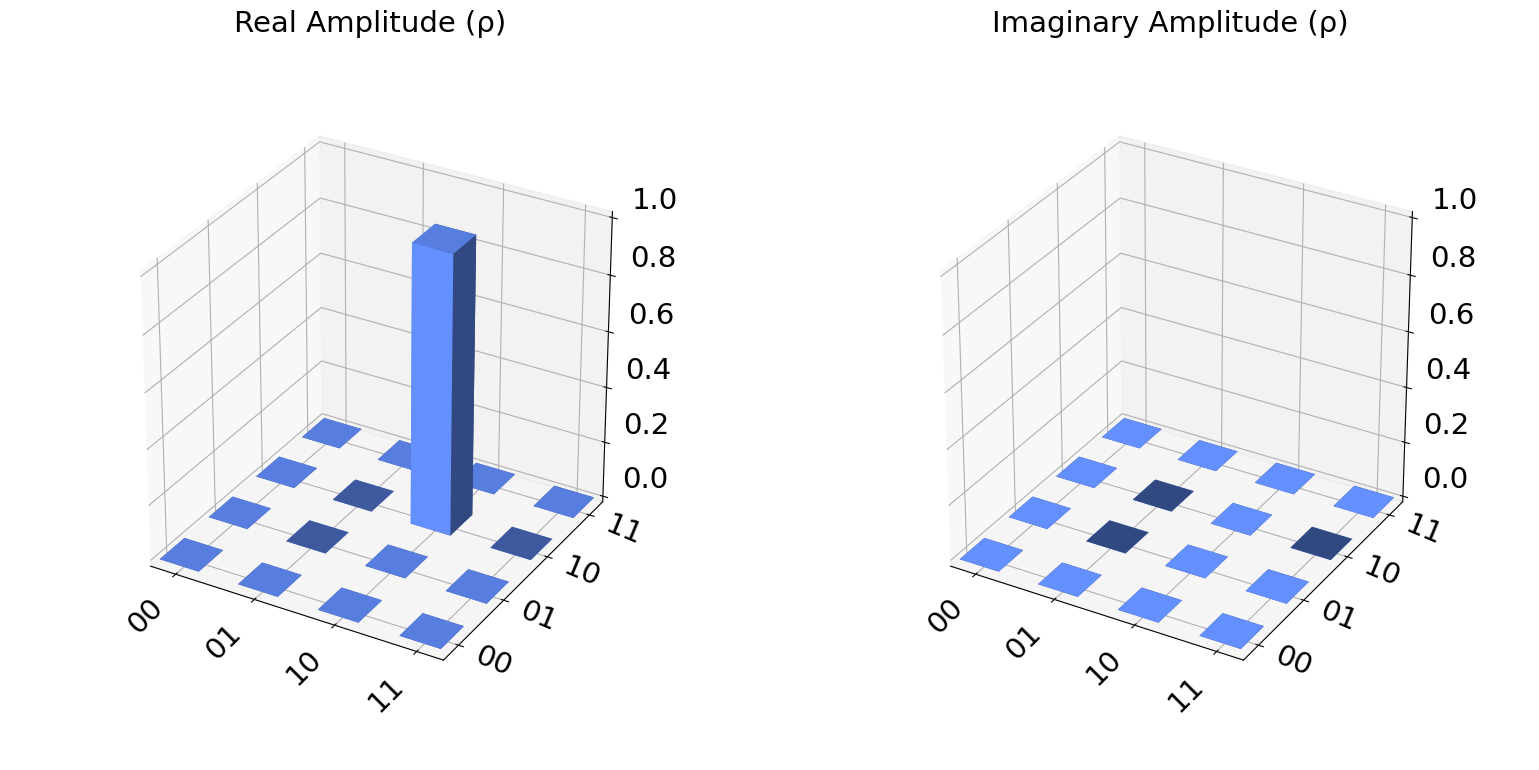

In [86]:
outputstate_3 = result_3.get_statevector(circ_3, decimals=3)

plot_state_city(outputstate_3)

### Cas 04 : le rituel est inscrit sur le grimoire 3 (état 11)

Pour représenter le pouvoir d'Aika, on aura besoin de :

- Une porte CZ sur q0 et q1.

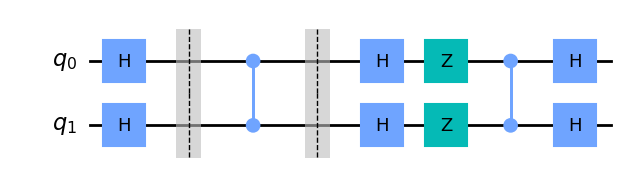

In [83]:
# Circuit de base
circ_4 = QuantumCircuit(2)
circ_4.h(0)
circ_4.h(1)
circ_4.barrier(range(2))

# Intervention d'Aïka
circ_4.cz(0,1)
circ_4.barrier(range(2))

# Diffuseur
circ_4.h(0)
circ_4.h(1)
circ_4.z(0)
circ_4.z(1)
circ_4.cz(0,1)
circ_4.h(0)
circ_4.h(1)

circ_4.draw('mpl')

In [84]:
# Mesure du circuit
circ_4.measure_all()

# Simulation
circ_4 = transpile(circ_4, backend)
simulator_4 = backend.run(circ_4)
result_4 = simulator_4.result()
counts_4 = result_4.get_counts()

print(counts_4)


{'11': 1}


Le grimoire à prendre est, alors, le grimoire 3, qui correspond à l’état 11

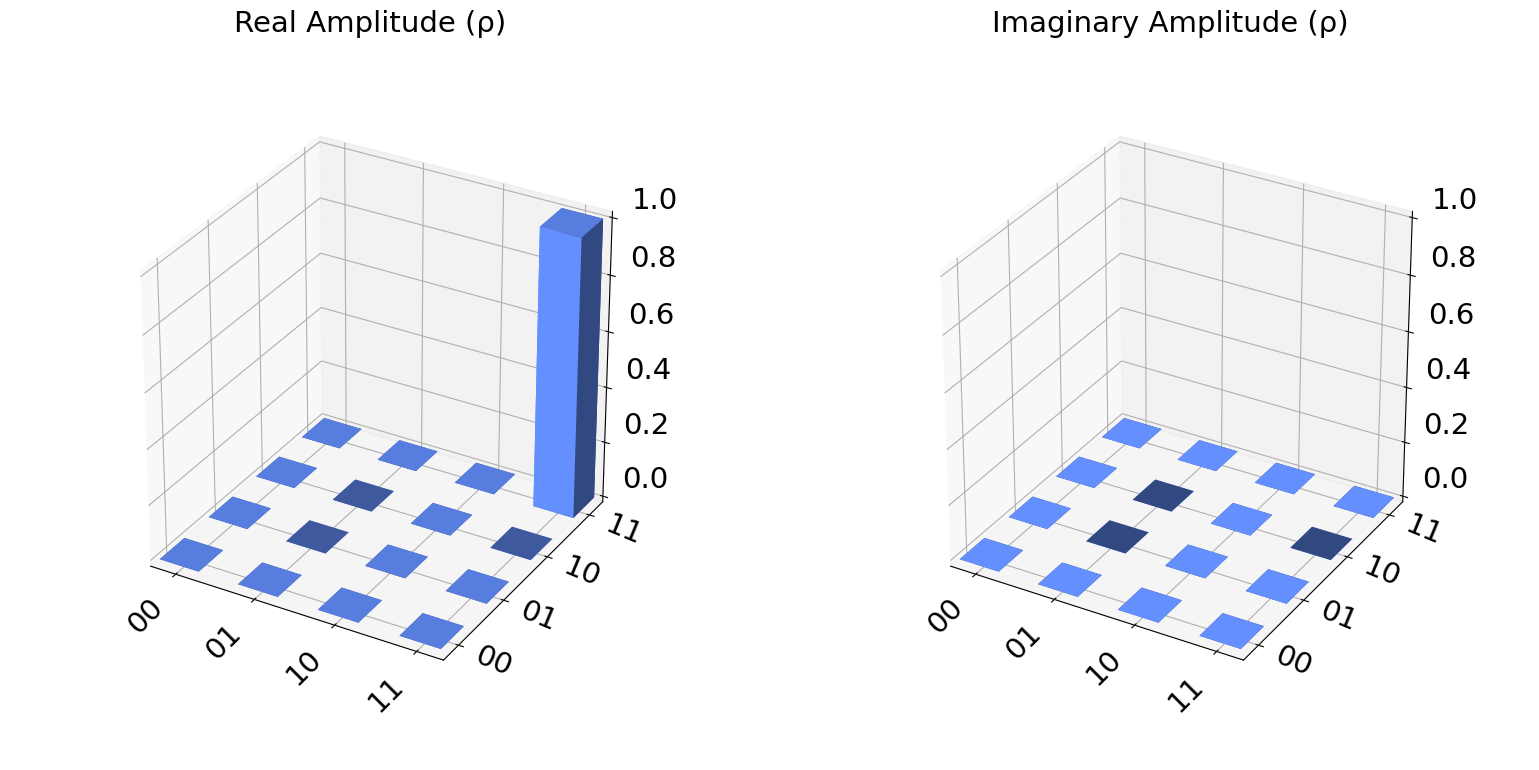

In [87]:
outputstate_4 = result_4.get_statevector(circ_4, decimals=3)

plot_state_city(outputstate_4)